# Dataset Introduction


In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/exploring-risk-factors-for-cardiovascular-diseas/heart_data.csv


# Cleaning and Pre-Processing of Data

In [2]:
# loading the data set
df = pd.read_csv("/kaggle/input/exploring-risk-factors-for-cardiovascular-diseas/heart_data.csv")
df.isnull().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

There seems to be no null values in the data. Next we should check the validity of a the data.

In [3]:
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


1. age appears to be in days: Let us convert it to their age in years.
2. height appears to be in cm. 
3. weight appeans to be in kg.
4. ap_hi and ap_lo are measured in mm Hg. The min values anf max values are seem to be erroneous. Therefore, we shall set a boundary to remove any impossibe measuements. So, a realistic estimation could be between 40 and 200 mm Hg.
5. chloesterol: 0 means less than 100 mg/dL, every increment is a 20 units addition.
6. gluc(glucose): 0 referes to <3.3 mmol/L and every increment is a 1 unit addition.
7. smoke, active, alco: lifestyle choices of smoking, active/not and alcohol. 

In [5]:
#cleaning dataset to filter out erroneous values of ap_hi and ap_lo.
df["bmi"] = df["weight"]/((df["height"]/100)*(df["height"]/100))
df = df[(df["ap_hi"]<200)&(df["ap_hi"]>50)&(df["ap_lo"]<200)&(df["ap_lo"]>50)]
df = df[ (df["bmi"] < 40) & (df["bmi"] > 10) ]
df["age"] = df["age"]/365
df = df.drop("index", axis=1)
df = df.set_index("id")
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,66749.000000,66749.000000,66749.000000,66749.000000,66749.000000,66749.000000,66749.000000,66749.000000,66749.000000,66749.000000,66749.000000,66749.000000,66749.000000
mean,53.303777,1.354282,164.571065,73.117618,126.196797,81.217082,1.356889,1.220767,0.088765,0.053409,0.804117,0.489311,27.008279
std,6.767268,0.478299,7.809218,12.791810,16.190805,9.416065,0.672890,0.566762,0.284407,0.224849,0.396882,0.499889,4.457495
min,29.583562,1.000000,120.000000,28.000000,70.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.726644
25%,48.342466,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.828125
50%,53.961644,1.000000,165.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.175195
75%,58.408219,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.752066
max,64.967123,2.000000,250.000000,135.000000,197.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,39.965649


# Exploratory Analysis

In [6]:
# Extracting Categorical Variables as Individual Variables
df_lifestyle = df[["cholesterol","smoke","alco","active","gender","gluc","cardio"]]
def change(x):
    if x == 0:
        x = "No"
    if x == 1:
        x = "Yes"
    return x
df_lifestyle["smoke"] = df_lifestyle["smoke"].apply(lambda x: change(x))
df_lifestyle["alco"] = df_lifestyle["alco"].apply(lambda x: change(x))
df_lifestyle["active"] = df_lifestyle["active"].apply(lambda x: change(x))
df_lifestyle["gender"] = df_lifestyle["gender"].apply(lambda x: str(x))
df_lifestyle["gluc"] = df_lifestyle["gluc"].apply(lambda x: str(x))
df_lifestyle["cardio"] = df_lifestyle["cardio"].apply(lambda x: change(x))
from scipy import stats
df_lifestyle.columns

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Index(['cholesterol', 'smoke', 'alco', 'active', 'gender', 'gluc', 'cardio'], dtype='object')

In [7]:
#df_stats = pd.DataFrame(columns = ["Lifestyle Variable","Chi-Square Value", 'p-value', "Degree of Freedom"], index = idx)
df_stats = pd.DataFrame()
for i in df_lifestyle.columns:
    cross_tab = pd.crosstab(df_lifestyle[i], df_lifestyle['cardio'])
    chi_sq = stats.chi2_contingency(cross_tab)[0]
    p_val = stats.chi2_contingency(cross_tab)[1]
    DOF = stats.chi2_contingency(cross_tab)[2]
    pd_to_concat = {"Chi-Square Value": chi_sq, "p-value" : p_val, "Degree of Freedom": DOF }
    pd_to_concat = pd.DataFrame(data = pd_to_concat, index = [i])
    try:
        df_stats = pd.concat([df_stats, pd_to_concat])
    except:
        df_stats = pd_to_concat
def rel_to_heart(x):
    if x < 0.01:
        y = "Reject Null Hypothesis"
    else:
        y = "Cannot Reject Null Hypothesis"
    return y
df_stats["Test Result"] = df_stats["p-value"].apply(lambda x: rel_to_heart(x))
df_stats.iloc[:-1]

,Chi-Square Value,p-value,Degree of Freedom,Test Result
cholesterol,3241.772962,0.000000e+00,2,Reject Null Hypothesis
smoke,16.162198,5.814292e-05,1,Reject Null Hypothesis
alco,4.993760,2.543888e-02,1,Cannot Reject Null Hypothesis
active,87.609334,7.974743e-21,1,Reject Null Hypothesis
gender,8.612394,3.338832e-03,1,Reject Null Hypothesis
gluc,545.885556,2.900398e-119,2,Reject Null Hypothesis


Based on the chi-square test chloeastrol, smoke, activity and glucose appear to have a correlation with cardiovascular diseases.

### Chloestrol

<AxesSubplot:xlabel='cholesterol', ylabel='Count'>

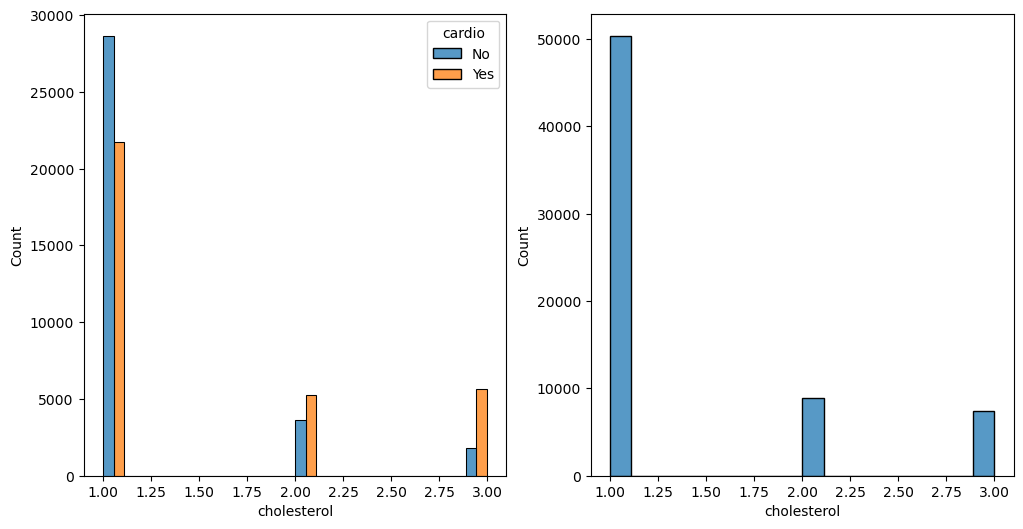

In [8]:
#Visualize relationship between chloestrol
fig, axes = plt.subplots(1,2,figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data=df_lifestyle, x="cholesterol", hue="cardio", multiple="dodge")
plt.subplot(1,2,2)
sns.histplot(data=df_lifestyle, x="cholesterol")

### Smoking

<AxesSubplot:xlabel='smoke', ylabel='Count'>

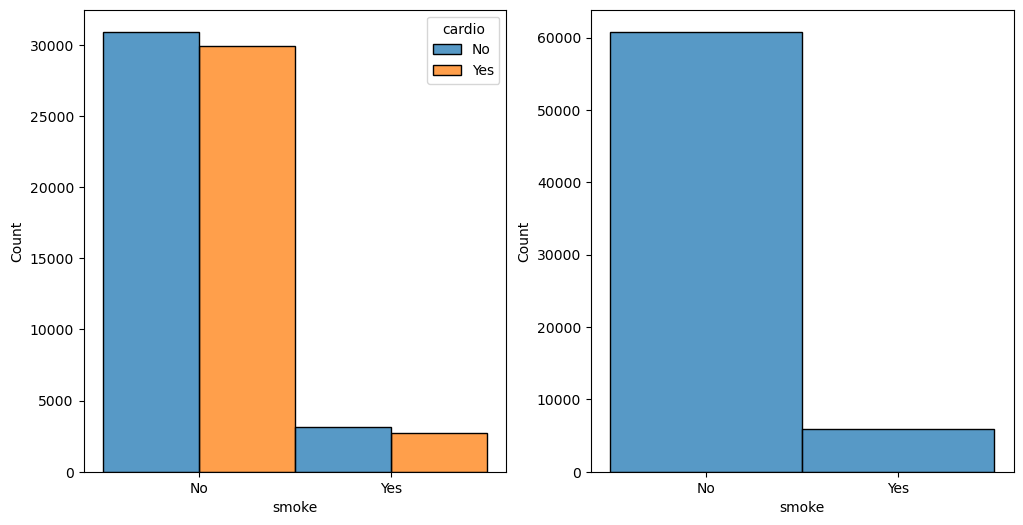

In [9]:
#Visualize relationship between chloestrol
fig, axes = plt.subplots(1,2,figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data=df_lifestyle, x="smoke", hue="cardio", multiple="dodge")
plt.subplot(1,2,2)
sns.histplot(data=df_lifestyle, x="smoke")

## Checking CVD spred with respect to different physiological factors

### Activity

<AxesSubplot:xlabel='active', ylabel='Count'>

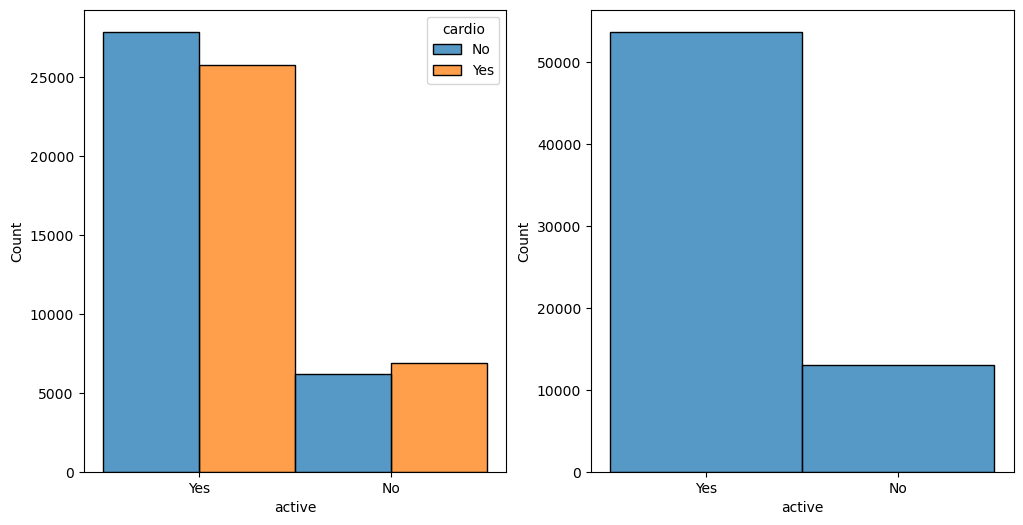

In [10]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data=df_lifestyle, x="active", hue="cardio", multiple="dodge")
plt.subplot(1,2,2)
sns.histplot(data=df_lifestyle, x="active")

### Glucose

<AxesSubplot:xlabel='gluc', ylabel='Count'>

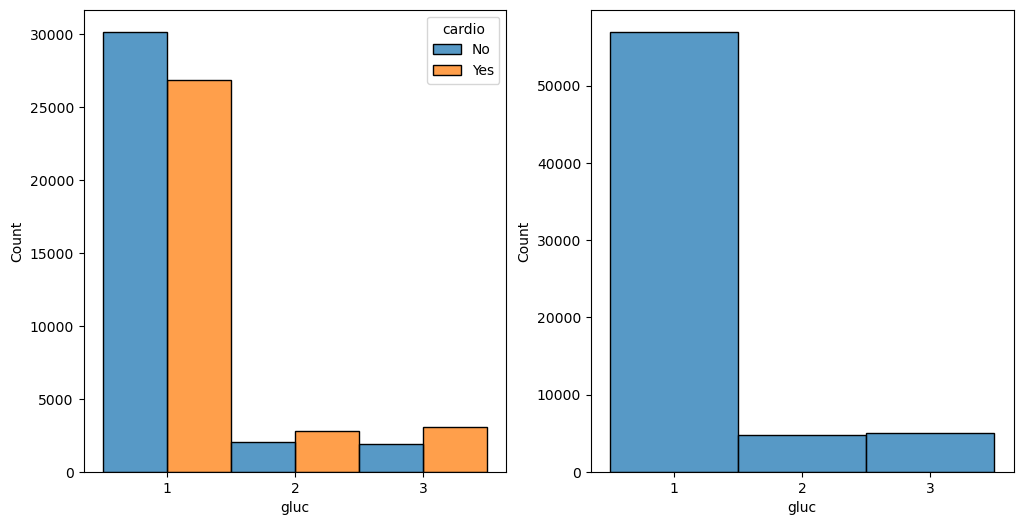

In [11]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data=df_lifestyle, x="gluc", hue="cardio", multiple="dodge")
plt.subplot(1,2,2)
sns.histplot(data=df_lifestyle, x="gluc")

### Summary

# Other Factors

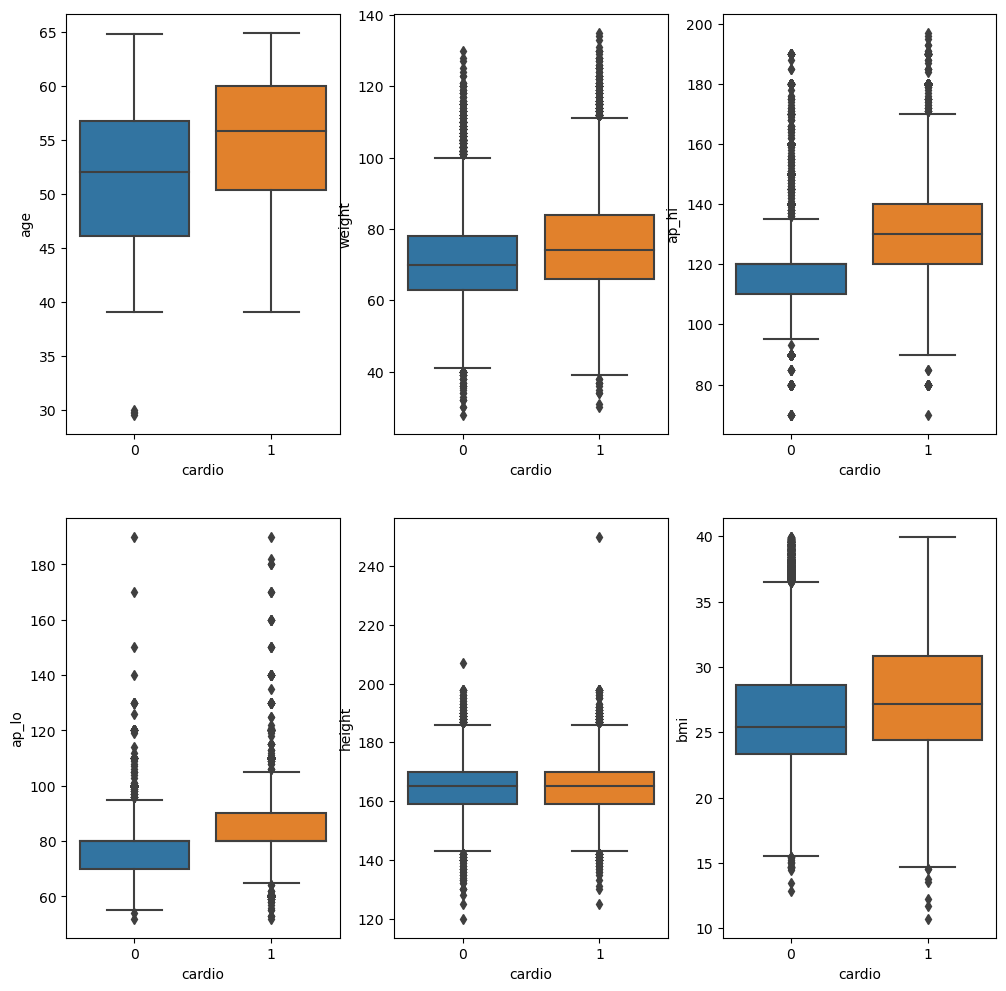

In [12]:
df_physio = df[["age","weight", "ap_hi", "ap_lo", "height","bmi", "cardio"]]
ind = 1
fig, axes = plt.subplots(2,3,figsize=(12,12))
for i in df_physio.columns:
    if ind <= 6:
        plt.subplot(2,3,ind)
        sns.boxplot(data = df_physio, y=i, x="cardio" )
    ind = ind+1


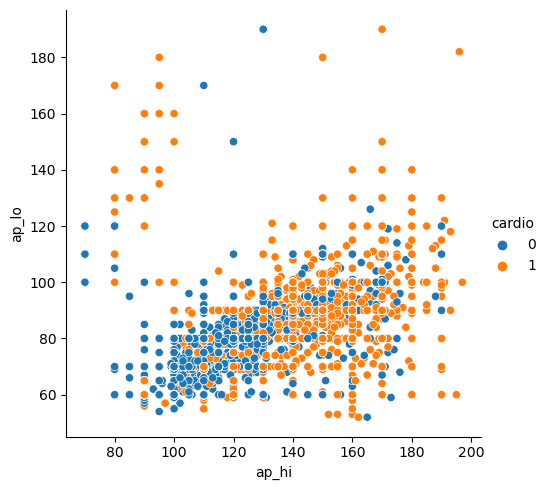

In [13]:
sns.relplot(data=df_physio,x="ap_hi", y="ap_lo", hue = "cardio")

# Classification To Predict CVD

### Trian-Test split:

In [14]:

df_model_prep = df[["age", "ap_hi","bmi","active", "cholesterol","gluc", "cardio","smoke",
                   "active", "gender"]]
X = df_model_prep[["age", "ap_hi","bmi","active", "cholesterol","gluc","smoke",
                  "active", "gender"]]
y = df_model_prep["cardio"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

### Gradient Boosted Decision Tree:

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(X_train)
parameters = {'learning_rate':[0.01, 0.1, 0.5, 1, 5, 10], 
              "n_estimators":[10, 25, 50, 75, 100, 200],
              "max_depth": [1, 2, 3], 
              "max_features":[1,2,3,4] }

In [16]:
#ne_net = GradientBoostingClassifier()
#clf1 = GridSearchCV(ne_net, parameters).fit(X_train, y_train)
#df_clf1= pd.DataFrame(clf.cv_results_)
#df_clf[(df_clf["param_max_depth"]==3)&(df_clf["param_n_estimators"]==100)] 

In [17]:
clf1 = GradientBoostingClassifier(learning_rate=0.5, max_depth=3,
                                  max_features= 4, 
                                  n_estimators=100).fit(X_train, y_train)
print("Training Accuracy: " + str(clf1.score(X_train,y_train)) )
print("Testing Accuracy: " + str(clf1.score(X_test,y_test)) )

Training Accuracy: 0.7422407550750331
Testing Accuracy: 0.7329213483146068


Best accuracy obtained is only around 0.7.

### k-Nearest Neighbours

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
#parameters = {'n_neighbors':[1, 5, 10, 15, 20, 25, 50, 100, 200, 500]}
#nei = KNeighborsClassifier()
#print("Testing Accuracy: "+ str(clf1.score(X_test, y_test))[:6])
#df_clf2= pd.DataFrame(GridCV2.cv_results_)

In [20]:
clf2= KNeighborsClassifier(n_neighbors = 15).fit(scaler.transform(X_train), y_train) 
print("Training Accuracy: "+ str(clf2.score(scaler.transform(X_train), y_train))[:6])
print("Testing Accuracy: "+ str(clf2.score(scaler.transform(X_test), y_test))[:6])

Training Accuracy: 0.7491
Testing Accuracy: 0.7182


#### k-NN vs Gradient Boosted Tree

Text(0.5, 1.0, 'Gradient Boosted Decision Tree')

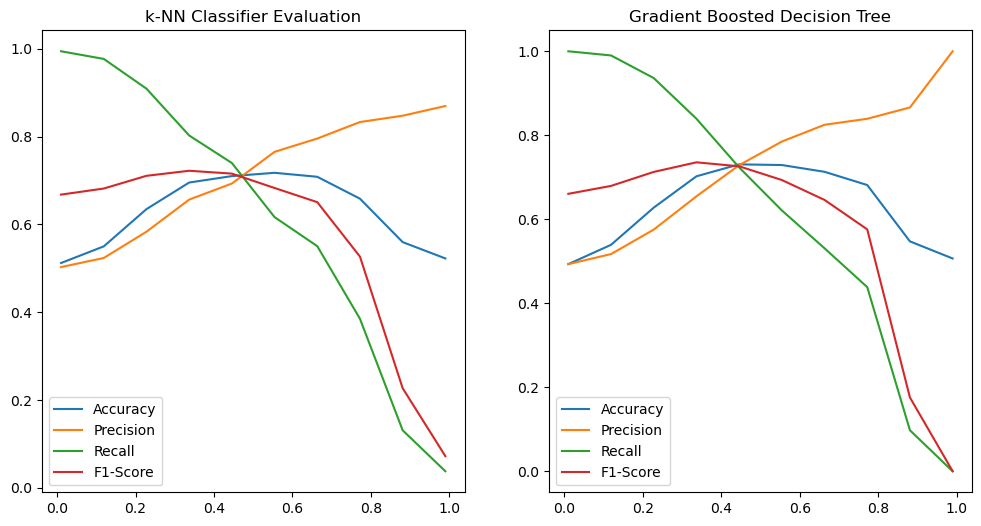

In [21]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score 
# k-NN Evaluation
threshold = np.linspace(0.01,0.99,10)
accuracy = list()
precision = list()
recall = list()
f1  = list()
for i in threshold:
    y_pred_test = (clf2.predict_proba(scaler.transform(X_test))[:,1] >= i).astype(int)
    accuracy.append(accuracy_score(y_test, y_pred_test))
    precision.append(precision_score(y_test, y_pred_test))
    recall.append(recall_score(y_test, y_pred_test))
    f1.append(f1_score(y_test, y_pred_test))

fig = plt.subplots(1,2,figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(threshold, np.array(accuracy) )
plt.plot(threshold, np.array(precision) )
plt.plot(threshold, np.array(recall) )
plt.plot(threshold, np.array(f1) )
plt.legend(["Accuracy","Precision","Recall", "F1-Score"])
plt.title("k-NN Classifier Evaluation")
# 
accuracy = list()
precision = list()
recall = list()
f1  = list()
for i in threshold:
    y_pred_test = (clf1.predict_proba(X_test)[:,1] >= i).astype(int)
    accuracy.append(accuracy_score(y_test, y_pred_test))
    precision.append(precision_score(y_test, y_pred_test))
    recall.append(recall_score(y_test, y_pred_test))
    f1.append(f1_score(y_test, y_pred_test))

plt.subplot(1,2,2)
plt.plot(threshold, np.array(accuracy) )
plt.plot(threshold, np.array(precision) )
plt.plot(threshold, np.array(recall) )
plt.plot(threshold, np.array(f1) )
plt.legend(["Accuracy","Precision","Recall", "F1-Score"])
plt.title("Gradient Boosted Decision Tree")

In [22]:
from sklearn.neural_network import MLPClassifier
clf3 = MLPClassifier(hidden_layer_sizes=(10,50), activation='tanh',random_state=1, alpha= 0.1).fit(scaler.transform(X_train), y_train)
print("Training Accuracy: "+ str(clf3.score(scaler.transform(X_train), y_train))[:6])
print("Testing Accuracy: "+ str(clf3.score(scaler.transform(X_test), y_test))[:6])

Training Accuracy: 0.7311
Testing Accuracy: 0.7312


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Neural Network Evaluation')

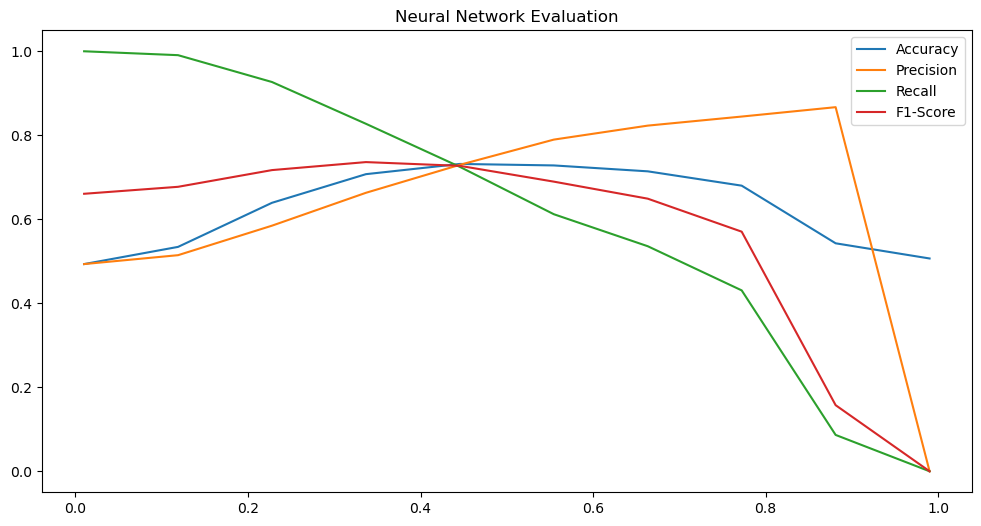

In [23]:

# Neural Network Evaluation
threshold = np.linspace(0.01,0.99,10)
accuracy = list()
precision = list()
recall = list()
f1  = list()
for i in threshold:
    y_pred_test = (clf3.predict_proba(scaler.transform(X_test))[:,1] >= i).astype(int)
    accuracy.append(accuracy_score(y_test, y_pred_test))
    precision.append(precision_score(y_test, y_pred_test))
    recall.append(recall_score(y_test, y_pred_test))
    f1.append(f1_score(y_test, y_pred_test))

fig = plt.figure(figsize = (12,6))
plt.plot(threshold, np.array(accuracy) )
plt.plot(threshold, np.array(precision) )
plt.plot(threshold, np.array(recall) )
plt.plot(threshold, np.array(f1) )
plt.legend(["Accuracy","Precision","Recall", "F1-Score"])
plt.title("Neural Network Evaluation")